Time Series - Yason Dawson

## Time Series 1

### Introduction to Time Series Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Plot Utilities

In [3]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  """
  Visualizes time series data
  
  Args:
    time (array of int) - contains the time steps
    series (array of int) - contains the measurements for each time step
    format (string) - line style when plotting the graph
    start (int) - first time step to plot
    end (int) - last time step to plot
    label (list of strings)- tag for the line
  """
  # Setup dimensions of the graph figure
  plt.figure(figsize=(10, 6))
  # Plot the time series data
  plt.plot(time[start:end], series[start:end], format)
  # Label the x-axis
  plt.xlabel("Time")
  # Label the y-axis
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14, labels=label)
  # Overlay a grid on the graph
  plt.grid(True)
  # Draw the graph on screen
  plt.show()

### Trend

The trend describes the general tendency of the values to go up or down as time progresses. Given
a certain time period, you can see if the graph is following an upward/positive trend,
downward/negative trend, or just flat. For instance, the housing prices in a good location can see a
general increase in valuation as time passes.
The simplest example to visualize is data that follows a straight line. You will use the function
below to generate that. The slope argument will determine what the trend is. If you're coming from
a mathematics background, you might recognize this as the slope-intercept form with the yintercept being 0 .

In [4]:
def trend(time, slope=0):
  """
  Generates synthetic data that follows a straight line given a slope value.
  Args:
    time (array of int) - contains the time steps
    slope (float) - determines the direction and steepness of the line
  Returns:
    series (array of float) - measurements that follow a straight line
  """
  # Compute the linear series given the slope
  series = slope * time
  return series

Here is a time series that trends upward. For a downward trend, simply replace the slope value
below with a negative value (e.g. -0.3 ).

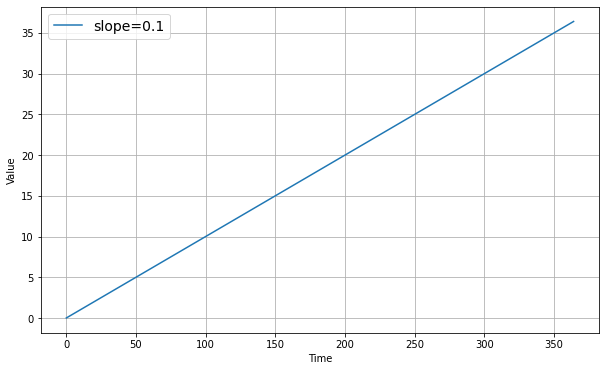

In [5]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

### Seasonality

In [6]:
def seasonal_pattern(season_time):
  """
  Just an arbitrary pattern, you can change it if you wish
  
  Args:
    season_time (array of float) - contains the measurements per time step
  Returns:
    data_pattern (array of float) - contains revised measurement values according
  to the defined pattern
  """
  
  # Generate the values using an arbitrary pattern
  data_pattern = np.where(season_time < 0.4,
                          np.cos(season_time * 2 * np.pi),
                          1 / np.exp(3 * season_time))
  return data_pattern

In [7]:
def seasonality(time, period, amplitude=1, phase=0):
  """
  Repeats the same pattern at each period
  
  Args:
    time (array of int) - contains the time steps
    period (int) - number of time steps before the pattern repeats
    amplitude (int) - peak measured value in a period
    phase (int) - number of time steps to shift the measured values
  
  Returns:
    data_pattern (array of float) - seasonal data scaled by the defined amplitude
  """
  # Define the measured values per period
  season_time = ((time + phase) % period) / period

  # Generates the seasonal data scaled by the defined amplitude
  data_pattern = amplitude * seasonal_pattern(season_time)

  return data_pattern

The cell below shows the seasonality of the data generated because you can see the pattern every
365 time steps.

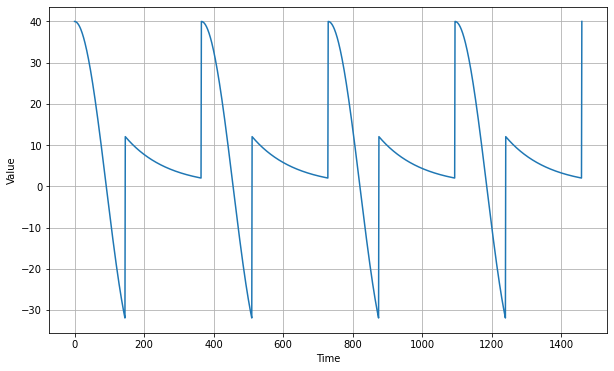

In [8]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

A time series can also contain both trend and seasonality. For example, the hourly temperature
might oscillate regularly in short time frames, but it might show an upward trend if you look at multiyear data.

The example below demonstrates a seasonal pattern with an upward trend:

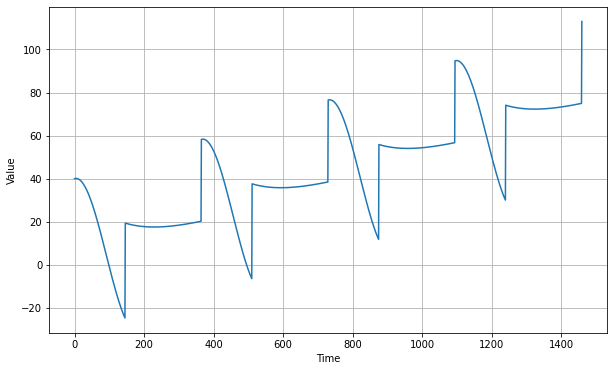

In [9]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

### Noise

In practice, few real-life time series have such a smooth signal. They usually have some noise riding
over that signal. The next cells will show what a noisy signal looks like:

In [10]:
def noise(time, noise_level=1, seed=None):
  """Generates a normally distributed noisy signal
  Args:
    time (array of int) - contains the time steps
    noise_level (float) - scaling factor for the generated signal
    seed (int) - number generator seed for repeatability
  Returns:
    noise (array of float) - the noisy signal
  """
  
  # Initialize the random number generator
  rnd = np.random.RandomState(seed)
  
  # Generate a random number for each time step and scale by the noise level
  noise = rnd.randn(len(time)) * noise_level
  
  return noise

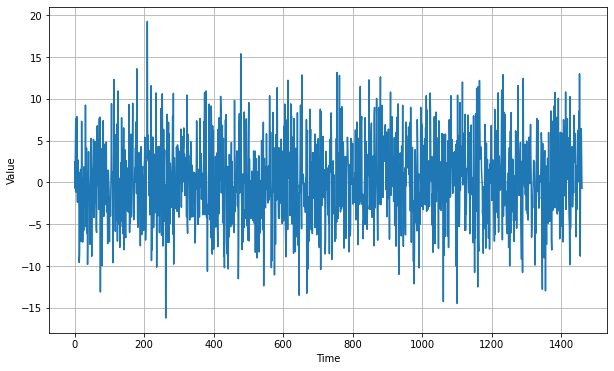

In [11]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

Now let's add this to the time series we generated earlier:

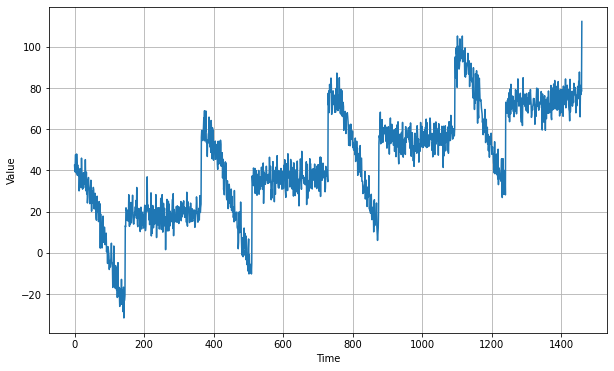

In [12]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

As you can see, the series is still trending upward and seasonal but there is more variation between
time steps because of the added noise.

### Autocorrelation

Time series can also be autocorrelated. This means that measurements at a given time step is a
function of previous time steps. Here are some functions that demonstrate that. Notice lines that
refer to the step variable because this is where the computation from previous time steps happen.
It will also include noise (i.e. random numbers) to make the result a bit more realistic.


In [13]:
def autocorrelation(time, amplitude, seed=None):
  """Generates autocorrelated data
  Args:
    time (array of int) - contains the time steps
    amplitude (float) - scaling factor
    seed (int) - number generator seed for repeatability
  Returns:
    ar (array of float) - autocorrelated data
  """

  # Initialize random number generator
  rnd = np.random.RandomState(seed)

  # Initialize array of random numbers equal to the length 
  # of the given time steps plus 50
  ar = rnd.randn(len(time) + 50)

  # Set first 50 elements to a constant
  ar[:50] = 100

  # Define scaling factors
  phi1 = 0.5
  phi2 = -0.1

  # Autocorrelate element 51 onwards with the measurement at
  # (t-50) and (t-30), where t is the current time step
  for step in range(50, len(time) + 50):
    ar[step] += phi1 * ar[step - 50]
    ar[step] += phi2 * ar[step - 33]

  # Get the autocorrelated data and scale with the given amplitude.
  # The first 50 elements of the original array is truncated because
  # those are just constant and not autocorrelated.
  ar = ar[50:] * amplitude
  return ar

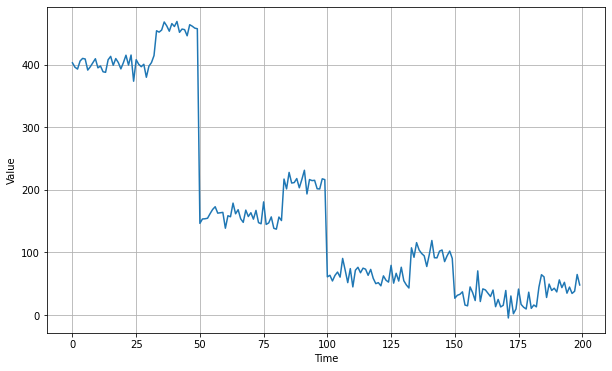

In [14]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

Here is a more straightforward autocorrelation function which just computes a value from the
previous time step.

In [15]:
def autocorrelation(time, amplitude, seed=None):
  """Generates autocorrelated data

  Args:
    time (array of int) - contains the time steps
    amplitude (float) - scaling factor
    seed (int) - number generator seed for repeatability
  
  Returns:
  ar (array of float) - generated autocorrelated data
  """

  # Initialize random number generator
  rnd = np.random.RandomState(seed)

  # Initialize array of random numbers equal to the length
  # of the given time steps plus an additional step
  ar = rnd.randn(len(time) + 1)

  # Define scaling factor
  phi = 0.8

  # Autocorrelate element 11 onwards with the measurement at
  # (t-1), where t is the current time step
  for step in range(1, len(time) + 1):
    ar[step] += phi * ar[step - 1]
  
  # Get the autocorrelated data and scale with the given amplitude.
  ar = ar[1:] * amplitude
  return ar

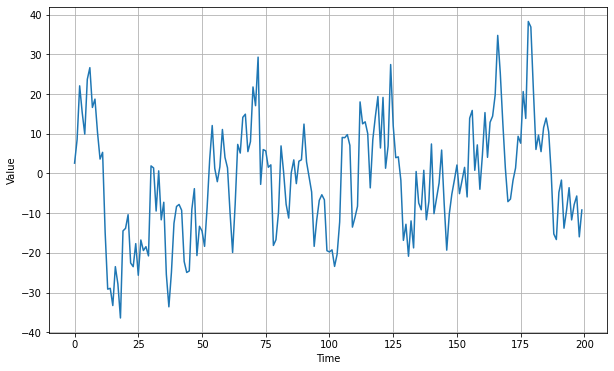

In [16]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time series you might encounter is one where it decays predictably after

In [17]:
def impulses(time, num_impulses, amplitude=1, seed=None):
  """Generates random impulses
  
  Args:
    time (array of int) - contains the time steps
    num_impulses (int) - number of impulses to generate
    amplitude (float) - scaling factor
    seed (int) - number generator seed for repeatability

  Returns:
    series (array of float) - array containing the impulses
  """

  # Initialize random number generator
  rnd = np.random.RandomState(seed)

  # Generate random numbers
  impulse_indices = rnd.randint(len(time), size=num_impulses)

  # Initialize series
  series = np.zeros(len(time))

  # Insert random impulses
  for index in impulse_indices:
    series[index] += rnd.rand() * amplitude
  
  return series

You will use the function above to generate a series with 10 random impulses.


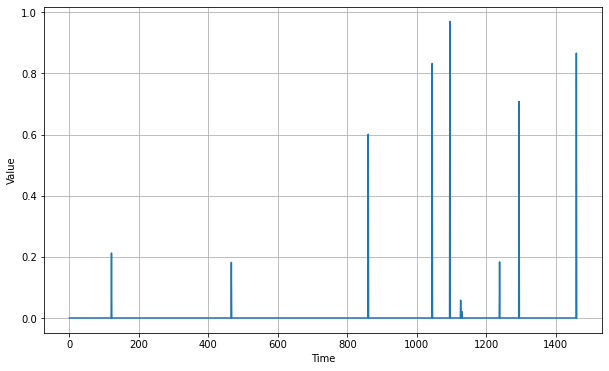

In [18]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

Now that you have the series, you will next define the function that will decay the next values after it
spikes.

In [19]:
def autocorrelation_impulses(source, phis):
  """ Generates autocorrelated data from impulses

  Args:
    source (array of float) - contains the time steps with impulses
    phis (dict) - dictionary containing the lag time and decay rates
  
  Returns:
    ar (array of float) - generated autocorrelated data
  """
  
  # Copy the source
  ar = source.copy()

  # Compute new series values based on the lag times and decay rates
  for step, value in enumerate(source):
    for lag, phi in phis.items():
      if step - lag > 0:
        ar[step] += phi * ar[step - lag]

  return ar

You can then use the function to generate the decay after the spikes. Here is one example that
generates the next value from the previous time step (i.e. t-1 , where t is the current time step):


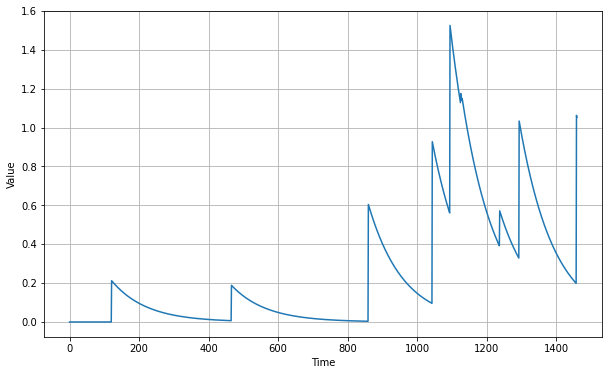

In [20]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

Here is another example where the next values are computed from those in t-1 and t-50 :

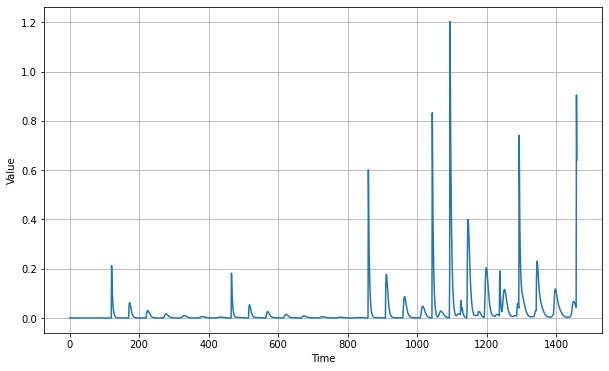

In [21]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line and it will look like below.

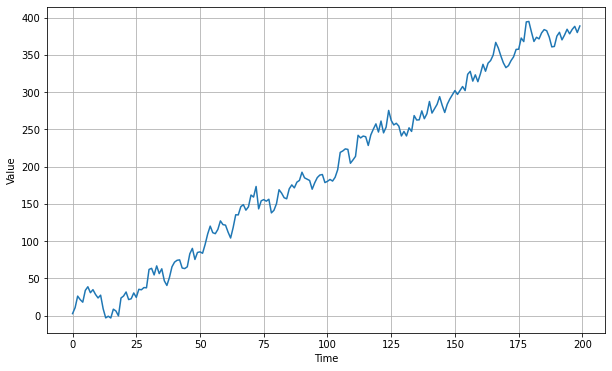

In [22]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

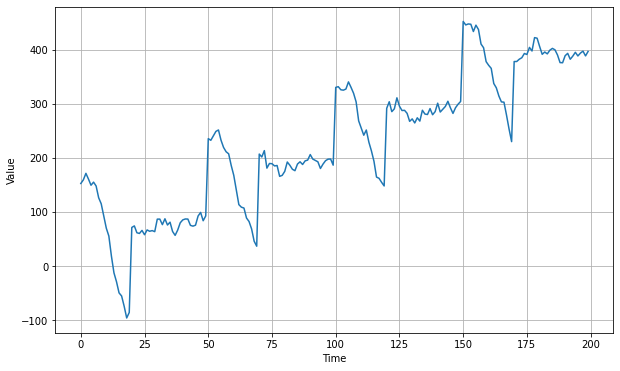

In [23]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend (time, 2)

# Plot the results
plot_series(time[:200], series[:200])

### Non-stationary Time Series

It is also possible for the time series to break an expected pattern. As mentioned in the lectures, big
events can alter the trend or seasonal behavior of the data. It would look something like below
where the graph shifted to a downward trend at time step = 200.

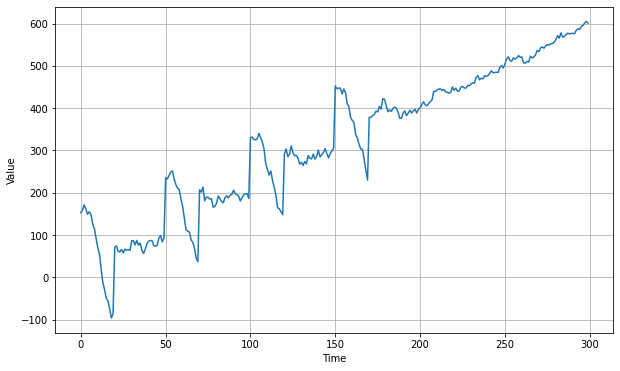

In [24]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend (time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend (time, 2)

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

In cases like this, you may want to train your model on the later steps (i.e. starting at t=200) since
these present a stronger predictive signal to future time steps.

## Statistical Forecasting on Synthetic Data (Exercises)


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [27]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

### Generate the synthetic data

You can then use the utility functions above to generate the synthetic data. This will start at a baseline then trend upwards with a seasonal pattern every 365 steps. You will also add some noise because real world data is often noisy as well.

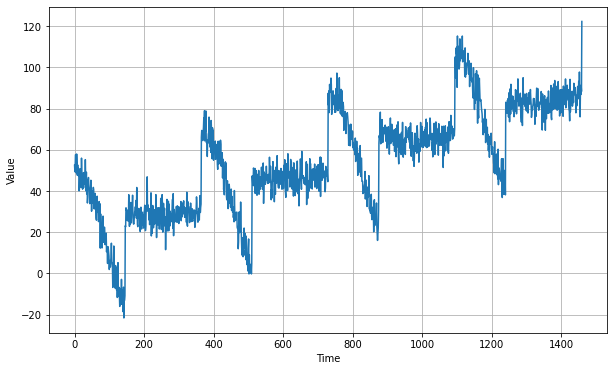

In [28]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

### Split the Dataset

Next up, you will split the data above into training and validation sets. You will take the first 1,000 points for training while the rest is for validation.

In [29]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

You can inspect these sets visually by using the same utility function for plotting. Notice that in general, the validation set has higher values (i.e. y-axis) than those in the training set. Your model should be able to predict those values just by learning from the trend and seasonality of the training set.

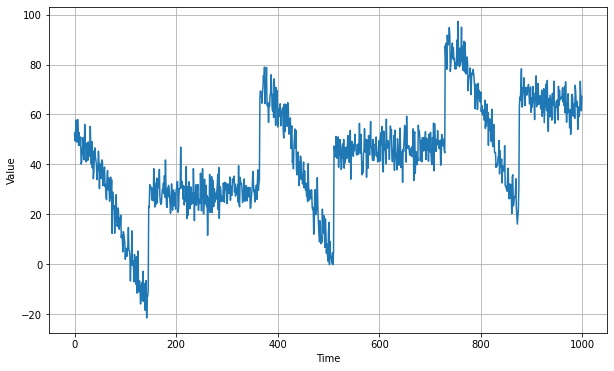

In [30]:
# Plot the train set
plot_series(time_train, x_train)

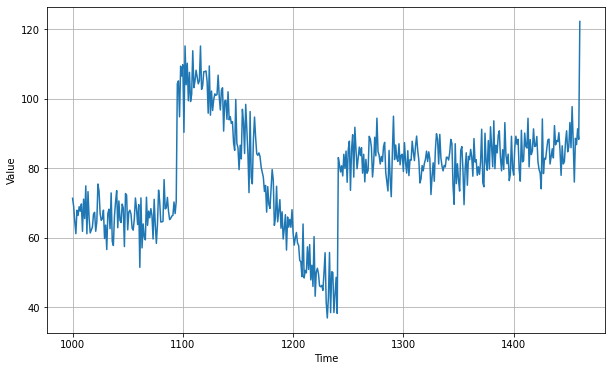

In [31]:
# Plot the validation set
plot_series(time_valid, x_valid)

### Naive Forecast

As a baseline, you can do a naive forecast where you assume that the next value will be the same as the previous time step. You can slice the original series like below and print some values as a sanity check. The next time step value should be identical to the ground truth at the previous time step.

In [32]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


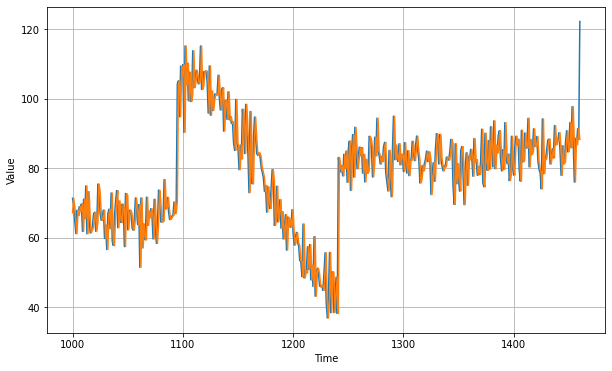

In [33]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

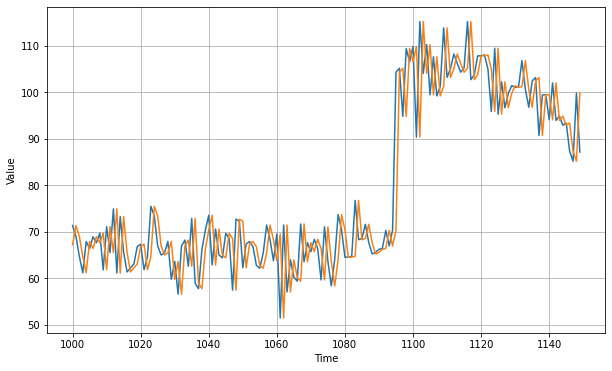

In [34]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

### Computing Metrics

Now you will compute the [mean squared error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_squared_error) and the [mean absolute error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_error) between the forecasts and the predictions in the validation period. These are available via the [`tf.keras.metrics`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/) API. 

In [35]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


### Moving Average

One technique you can use is to do a moving average. This sums up a series of time steps and the average will be the prediction for the next time step. For example, the average of the measurements at time steps 1 to 10 will be the forecast for time step 11, then the average for time steps 2 to 11 will be the forecast for time step 12, and so on.

The function below does the moving average for the entire `series`. It takes a `window_size` argument to indicate the number of time steps to consider when computing the mean.

In [36]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []
    
    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
    
    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

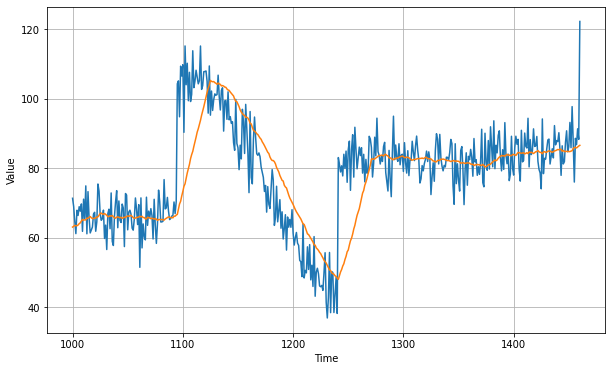

In [37]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [38]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above. You will try to remove these characteristics of the dataset with time differencing and see if you get better results.

### Differencing

Since the seasonality period is 365 days, you will subtract the value at time *t* – 365 from the value at time *t*. That is done with the code below. 

In addition, you will need to align the result with the `time` array. Since you can only do time differencing for `t >= 365`, you will need to truncate the first 365 time steps of the `time` array.

You can plot the result to visualize the values.

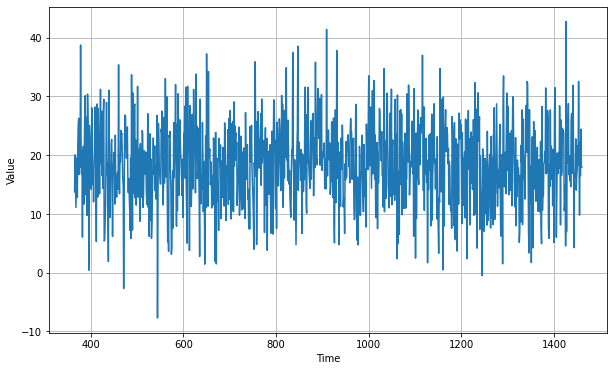

In [39]:
# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

The trend and seasonality seem to be gone so now you can retry using the moving average. `diff_series` is the ground truth while `diff_moving_avg` is the prediction array. You will slice these accordingly to correspond to the validation set time steps before comparing.

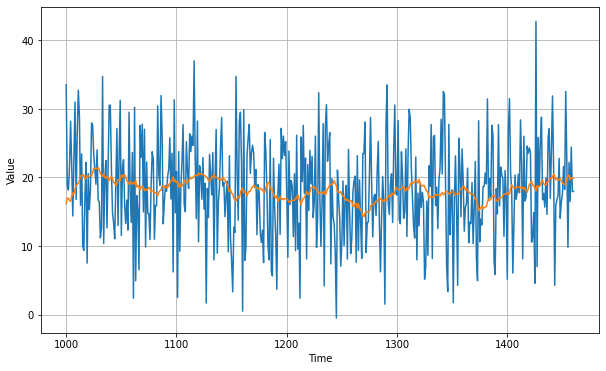

In [40]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

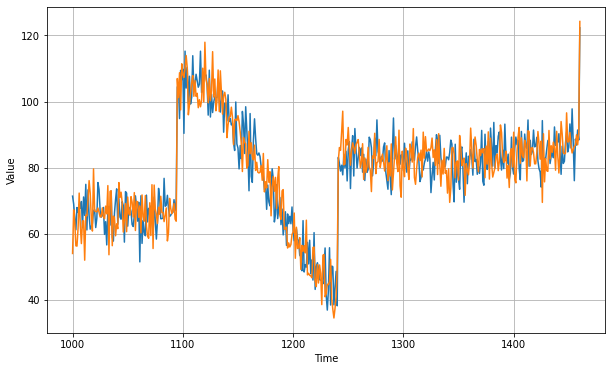

In [41]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [42]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

53.764587
5.9032416


It is a bit better than naive forecast. However, the forecasts look a bit too random because you're adding past values which are already noisy. Remember that the time differenced signal is also noisy so adding these raw past values can compound this problem. To remedy that, you can use a moving averaging on past values to smooth out some of this noise.

### Smoothing

You can use the same `moving_average_forecast()` function to smooth out past values before adding them back to the time differenced moving average. There are two ways to do this:

* Trailing windows - This refers to getting the mean of past values to smooth out the value at the current time step. For example, getting the average of `t=0` to `t=6` to get the smoothed data point at **`t=6`**.

* Centered windows - This refers to getting the mean of past *and future* values to smooth out the value at the current time step. For example, getting the average of `t=0` to `t=6` to get the smoothed data point at **`t=3`**.

The code below will use the centered windows approach and you will notice it in the slicing of the `series` array. It is shifted by `370` steps and the window size is `11`. To get the smooth data point at `t=1000` (i.e. start of the validation set), it will average the measurements at `t=995` to `t=1005`.

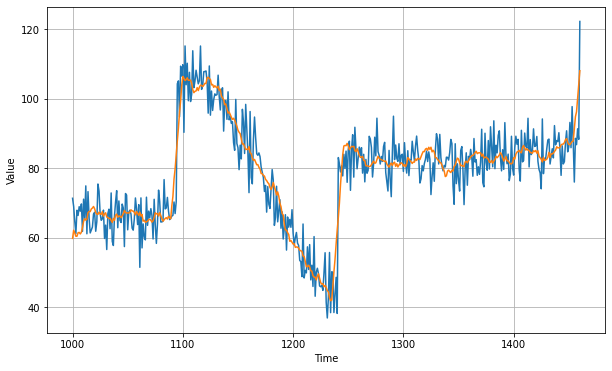

In [43]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [44]:
 # Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

34.315723
4.6053295


# Time Series 2

## Ungraded Lab: Preparing Time Series Features and Labels

In [45]:
import tensorflow as tf

In [45]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Preview the result
for val in dataset:
   print(val.numpy())

In [46]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data
dataset = dataset.window(size=5, shift=1)

# Print the result
for window_dataset in dataset:
  print(window_dataset)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [47]:
# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


In [48]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(size=5, shift=1, drop_remainder=True)

# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


### Flatten the Windows

In [49]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Print the results
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


### Group into features and labels

In [50]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [2 3 4 5]
y =  6

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [5 6 7 8]
y =  9



### Shuffle the data

In [51]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [2 3 4 5]
y =  6

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [5 6 7 8]
y =  9



### Create batches for training

In [52]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Create batches of windows
dataset = dataset.batch(2).prefetch(1)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [[2 3 4 5]
 [1 2 3 4]]
y =  [6 5]

x =  [[3 4 5 6]
 [0 1 2 3]]
y =  [7 4]

x =  [[4 5 6 7]
 [5 6 7 8]]
y =  [8 9]



## Ungraded Lab: Training a Single Layer Neural Network with Time Series Data

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series


def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern


def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

### Generate the Synthetic Data

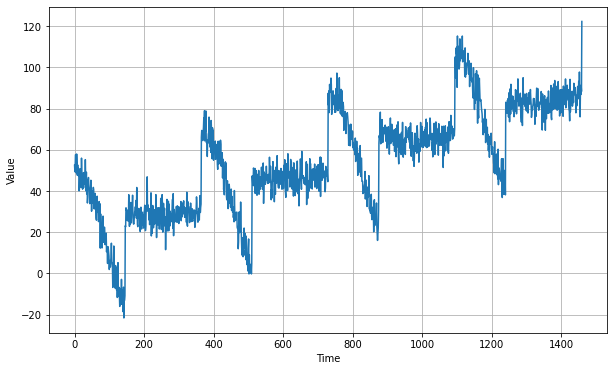

In [55]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

### Split Dataset

In [56]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

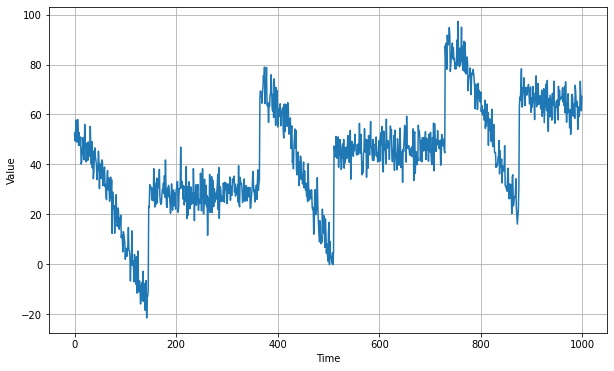

In [57]:
# Plot the train set
plot_series(time_train, x_train)

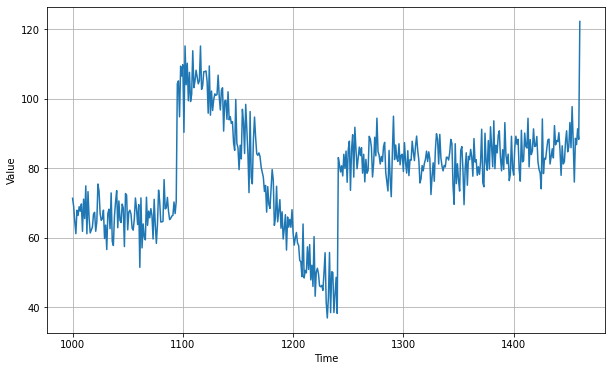

In [58]:
# Plot the validation set
plot_series(time_valid, x_valid)

### Prepare features and labels

In [59]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [60]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [61]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [62]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


### Build and compile the model

In [63]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[-0.17971551],
       [ 0.35396826],
       [-0.3552459 ],
       [-0.1532155 ],
       [ 0.06281024],
       [-0.28739548],
       [-0.44966   ],
       [-0.07286489],
       [ 0.18220323],
       [-0.20129684],
       [ 0.13934755],
       [ 0.10802114],
       [-0.3027959 ],
       [ 0.37650555],
       [-0.22222441],
       [-0.08301321],
       [ 0.11714727],
       [ 0.4519539 ],
       [ 0.16879213],
       [-0.30802548]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

### Train Model

In [65]:
# Train the model
model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 2s 28ms/step - loss: 1120.0889
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 136.8637
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 90.8398
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 88.1380
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 85.5156
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 84.5778
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 81.8055
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 79.6655
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 78.1959
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 76.0058
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 74.7747
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 73.7096
Epoch 13/100
31/31 [=

In [66]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-6.7643113e-02],
       [ 7.0148811e-02],
       [-2.8201977e-02],
       [-4.5825960e-03],
       [ 6.3522816e-02],
       [-7.2774396e-04],
       [-7.7104539e-02],
       [ 2.7083568e-02],
       [ 3.1554613e-02],
       [-1.7867367e-04],
       [-2.8455020e-03],
       [ 1.1600570e-02],
       [-9.1429159e-02],
       [ 1.2009315e-01],
       [-3.2396309e-02],
       [ 2.4687795e-02],
       [ 3.7810978e-02],
       [ 2.3845482e-01],
       [ 2.9619989e-01],
       [ 3.8059592e-01]], dtype=float32), array([0.01697133], dtype=float32)]


### Model Prediction

In [67]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
model prediction: [[42.94443]]


In [68]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

length of the forecast list: 461
shape of the validation set: (461,)


shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


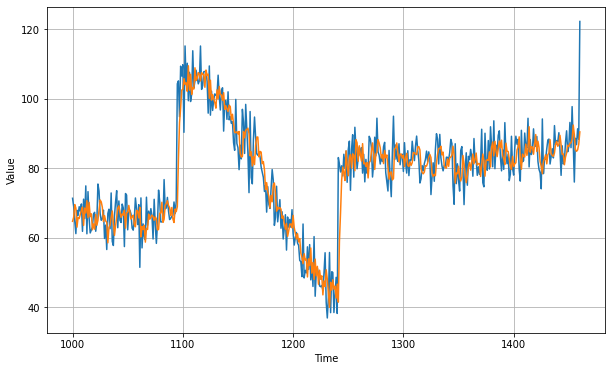

In [69]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [70]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

44.76485
4.9397883


## Ungraded Lab: Training a Deep Neural Network with Time Series Data

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

### Generate the Synthetic Data

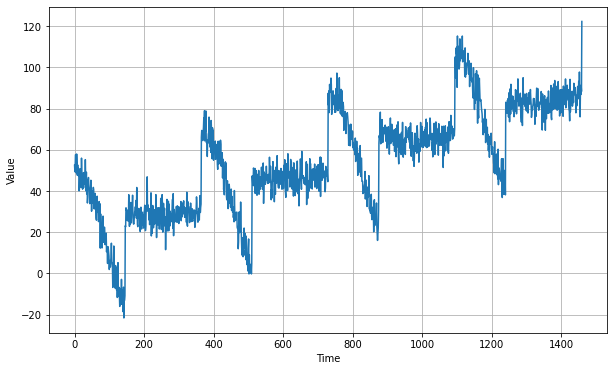

In [73]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

### Split Dataset

In [74]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

### Prepare Features and Labels

In [75]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [76]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to average
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [77]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

### Build the Model

In [78]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [79]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [80]:
# Train the model
model_baseline.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 92.9941
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 83.2499
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 78.8513
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 75.2165
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 73.4630
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 70.5225
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 68.9466
Epoch 8/100
31/31 [==============================] - 1s 8ms/step - loss: 67.1560
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 64.9767
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 63.8032
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 62.2421
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 61.6078
Epoch 13/100
31/31 [=====

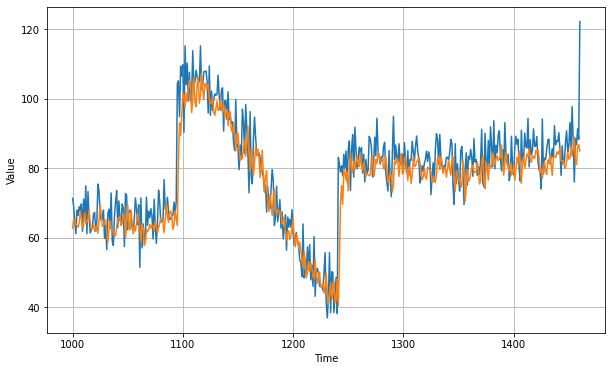

In [81]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

You can then get the MSE and MAE for reference.

In [82]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

54.195972
5.389918


### Tune the learning rate

In [83]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

In [84]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [85]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [86]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 6533.6299 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 4786.2051 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 3840.5493 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 3339.9414 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 2930.2209 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 2555.6694 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 2210.7939 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 1881.2850 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 1555.1954 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 1226.9796 - lr: 2.8184e-08

(1e-08, 0.001, 0.0, 300.0)

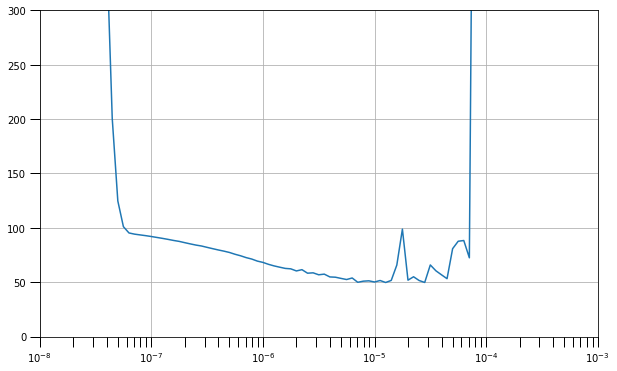

In [87]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

In [88]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [89]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

In [90]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 531.3378
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 89.0270
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 71.4909
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 65.5973
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 61.1837
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 57.6250
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 56.1095
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 55.1429
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 55.0298
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 54.4648
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 53.1665
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 54.2660
Epoch 13/100
31/31 [====

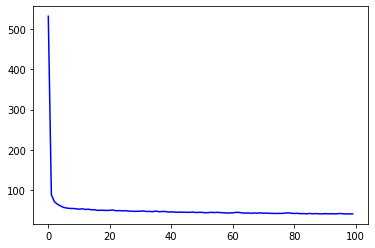

In [91]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

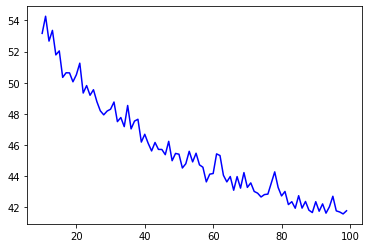

In [92]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

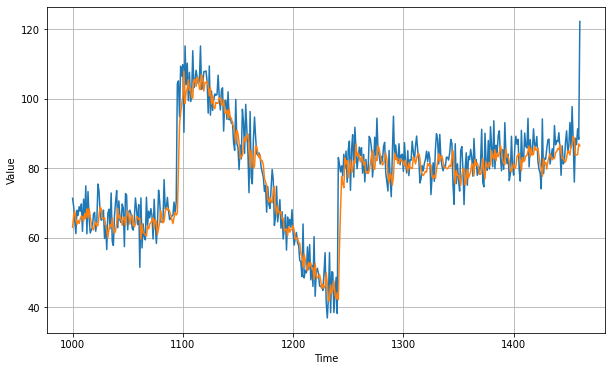

In [93]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [94]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

46.121628
4.9359283


# Time Series 3

## RNN/LSTM/GRU time series

In [95]:
import numpy as np # linear algebra
from numpy import newaxis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print ('import completed')

from google.colab import drive

drive.mount('/content/drive/')

import completed
Mounted at /content/drive/


In [96]:
# Enter in how much steps we will enroll the network.
# RNN/LSTM/GRU can be taught patterns over times series as big as the number of times you enrol them, and no bigger (fundamental limitation). 
# So by design these networks are deep/long to catch recurrent patterns.
Enrol_window = 100

print ('enrol window set to',Enrol_window )

enrol window set to 100


In [97]:
# Support functions
sc = MinMaxScaler(feature_range=(0,1))
def load_data(datasetname, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        #result = sc.fit_transform(result)
        result = normalise_windows(result)

    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    # A support function to normalize a dataset
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of <prediction_len> steps before shifting prediction run forward by <prediction_len> steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 
    
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

print ('Support functions defined')

Support functions defined


### Sinus wave proof of concept

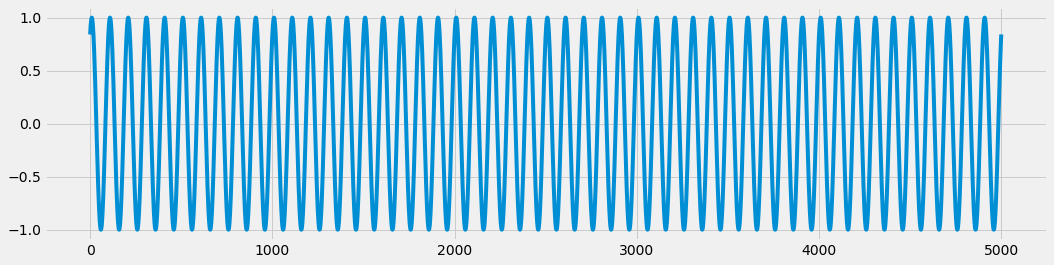

In [98]:
# Load the data
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Sin Wave Data Generator.csv')
dataset["Wave"][:].plot(figsize=(16,4),legend=False)

In [99]:
feature_train, label_train, feature_test, label_test = load_data(dataset, 'Wave', Enrol_window, False)
print ('Datasets generated')

Datasets generated


In [100]:
# The LSTM model I would like to test
# Note: replace LSTM with GRU or RNN if you want to try those

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')
print ('model compiled')
print (model.summary())

model compiled
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
#Train the model
model.fit(feature_train, label_train, batch_size=512, epochs=10, validation_data = (feature_test, label_test))

Epoch 1/10
9/9 [==============================] - 23s 2s/step - loss: 0.3482 - val_loss: 0.1540
Epoch 2/10
9/9 [==============================] - 22s 3s/step - loss: 0.1091 - val_loss: 0.0535
Epoch 3/10
9/9 [==============================] - 25s 3s/step - loss: 0.0329 - val_loss: 0.0045
Epoch 4/10
9/9 [==============================] - 16s 2s/step - loss: 0.0101 - val_loss: 0.0031
Epoch 5/10
9/9 [==============================] - 18s 2s/step - loss: 0.0065 - val_loss: 0.0012
Epoch 6/10
9/9 [==============================] - 16s 2s/step - loss: 0.0055 - val_loss: 0.0013
Epoch 7/10
9/9 [==============================] - 15s 2s/step - loss: 0.0052 - val_loss: 2.7498e-04
Epoch 8/10
9/9 [==============================] - 14s 1s/step - loss: 0.0047 - val_loss: 1.8422e-04
Epoch 9/10
9/9 [==============================] - 13s 1s/step - loss: 0.0045 - val_loss: 2.2593e-04
Epoch 10/10
9/9 [==============================] - 17s 2s/step - loss: 0.0042 - val_loss: 2.1007e-04


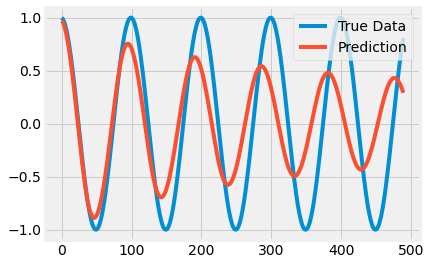

In [102]:
#Let's use the model and predict the wave
predictions= predict_sequence_full(model, feature_test, Enrol_window)
plot_results(predictions,label_test)

### Results
Actually not a bad result because remember the models predicts 500 steps in the future and more-over after the enrol_window length (eg 100 setps) the predictions are being made on predictions, so eny error quickly multiplies ba magnitudes.  
Having this confidence let's try to predicts some stock prices

## IBM stock prediction
Could we predict stock prices with the neural network? Let's try it on some actual data. The daily stock prices of IBM stock are available for 2006-2017. Let's try to predict that last 10% of the data (approx the 2017 data) based on all the data before.

In [103]:
# Let's get the stock data
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


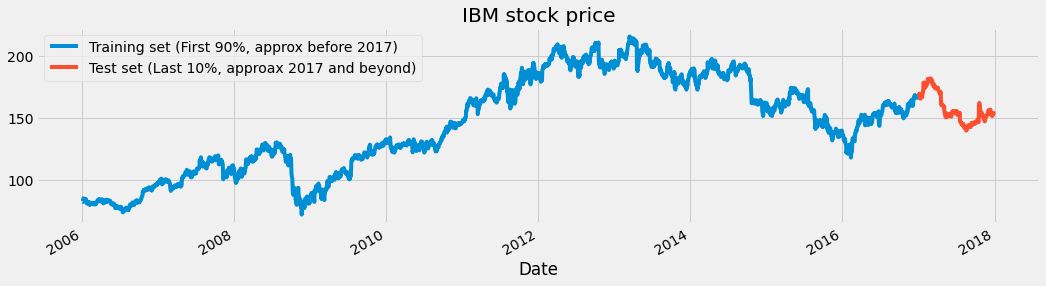

In [104]:
feature_train, label_train, feature_test, label_test = load_data(dataset, 'Close', Enrol_window, True)
dataset["Close"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["Close"]['2017':].plot(figsize=(16,4),legend=True) # 10% is used for thraining data which is approx 2017 data
plt.legend(['Training set (First 90%, approx before 2017)','Test set (Last 10%, approax 2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [105]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')
print ('model compiled')
print (model.summary())

model compiled
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
#Train the model
model.fit(feature_train, label_train, batch_size=512, epochs=5, validation_data = (feature_test, label_test))

Epoch 1/5
6/6 [==============================] - 13s 1s/step - loss: 0.0133 - val_loss: 0.0042
Epoch 2/5
6/6 [==============================] - 11s 2s/step - loss: 0.0025 - val_loss: 0.0022
Epoch 3/5
6/6 [==============================] - 15s 3s/step - loss: 0.0016 - val_loss: 8.5905e-04
Epoch 4/5
6/6 [==============================] - 10s 2s/step - loss: 0.0014 - val_loss: 7.3095e-04
Epoch 5/5
6/6 [==============================] - 12s 2s/step - loss: 0.0010 - val_loss: 5.6940e-04


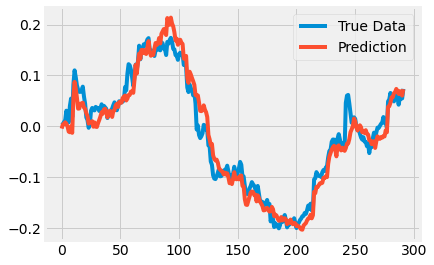

In [107]:
predicted_stock_price = model.predict(feature_test)
plot_results(predicted_stock_price,label_test)

### Everybody on Kaggle rich! 
This looks incredible correct, but "if it is to good to be true, it is probably not true".  
Let's step back and actually see what we did. We created a testset of 100 (dependend on how you set the enrol_window) actual datapoints and ask to predict nr 101 (which is probably anhow close to nr 100). And we did so for each point in this graph. Hence the fantastic result, it wasn't that hard (Remember that you are looking at normalised data)

Like the sinewave example we need to predict a new point based on the actual last 100 points, the next point on 99 actual points and 1 prediction, the next point on 98 actuals and 2 predictions, and so forth.   
Lets make some 50 predictions ahead in the future and do this every 50 times to get a bearing how the model predicts

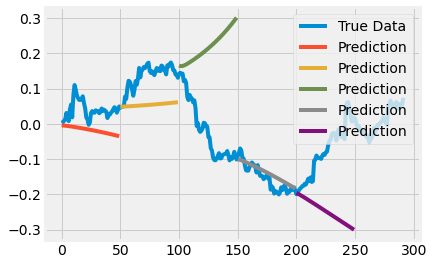

In [108]:
predictions = predict_sequences_multiple(model, feature_test, Enrol_window, 50)
plot_results_multiple(predictions, label_test, 50)  

###  We can't predict future stock prices on historic data
Ouch, can't use that to put some real money in the stock market.  We basically knew already that you cant predict future stock prices on historic data. Pick for example the grey or purple line, it probably learned the stock went down last 100 sequence so it predicts it will go down, what would be a recognizable pattern to predict the trend will break and would go back up again after point 200.  So it is nog recognisable in the historic data, else the algorithem would have found it. Maybe with a richer data set with correleated stocks? Other (News?) items? Etc Anyhow, still a nice learning example which helped me to practice with LSTM (but could also picked GRU or RNN, fw simple code changes in the model)

##  Deep Learning and time-series data analysis. 

The description of data can be found here:
http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [109]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts

from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [110]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [114]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

### EDA

In [115]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [117]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [118]:
df.shape

(2075259, 7)

In [119]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [120]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### Dealing with missing values  'nan' with a test statistic

In [121]:
droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [122]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [123]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Data visualization

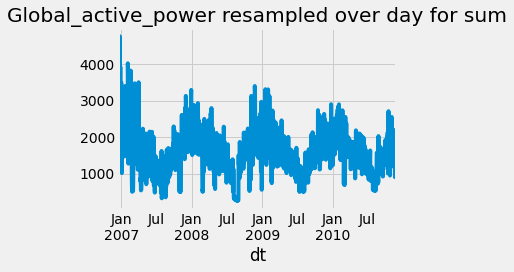

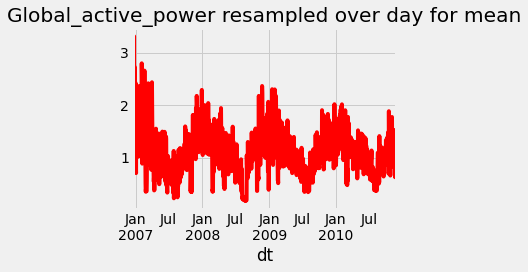

In [124]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

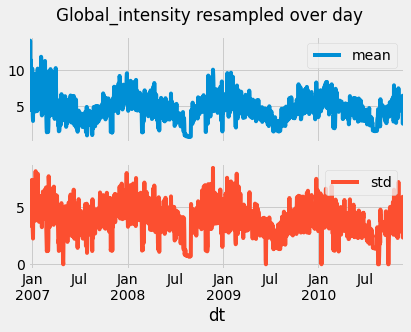

In [125]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

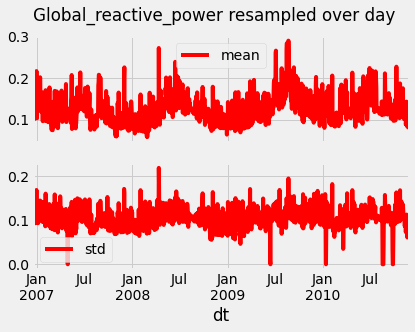

In [126]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

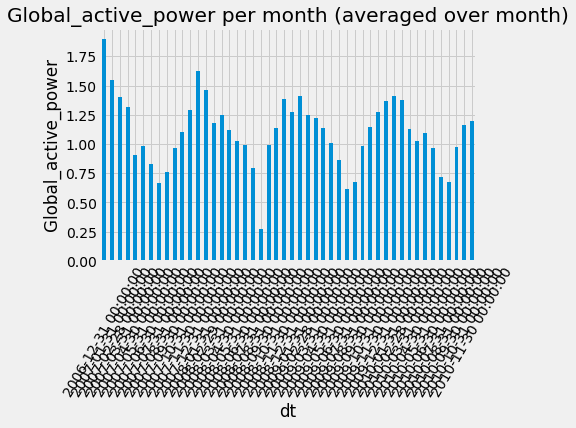

In [127]:
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

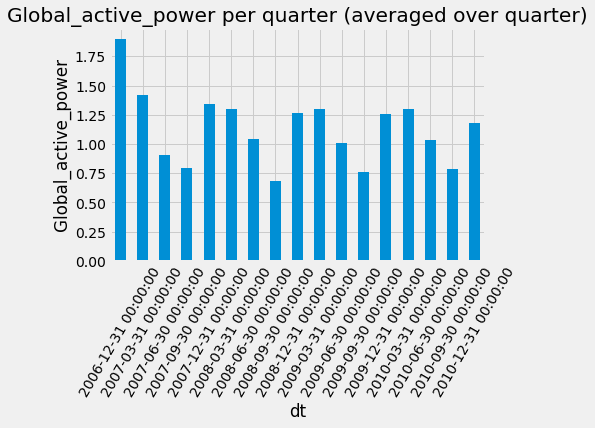

In [128]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

### It is very important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering. 

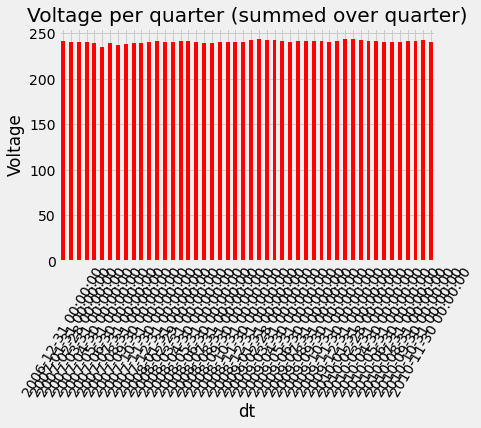

In [129]:
## mean of 'Voltage' resampled over month
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

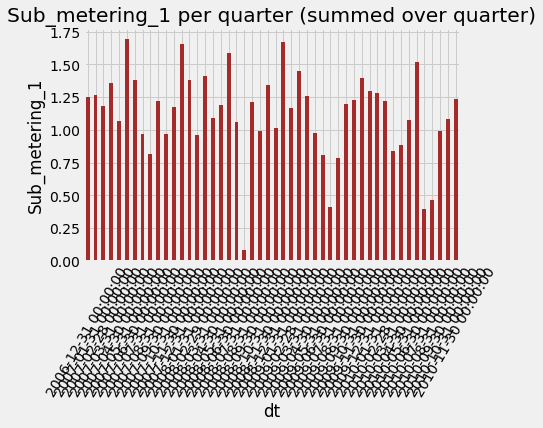

In [130]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

 ### It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.

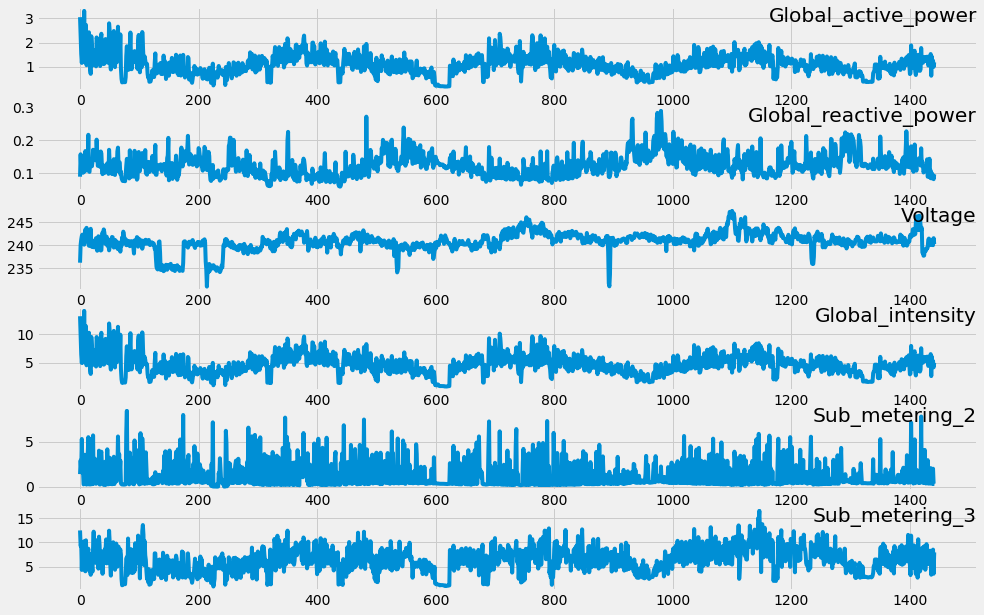

In [131]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

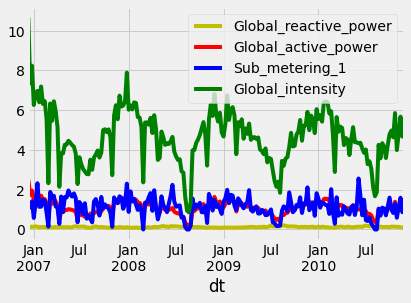

In [132]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

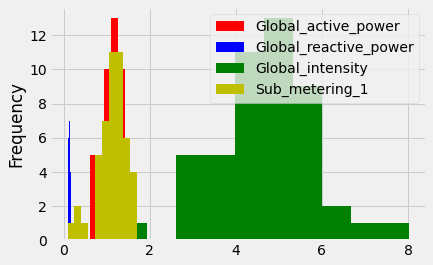

In [133]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)

#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

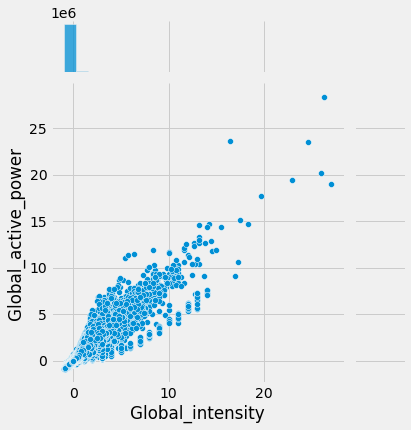

In [134]:
#The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

###  From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose. 

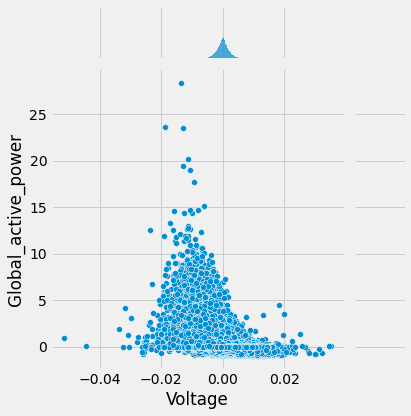

In [135]:
#The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

### Correlations among features

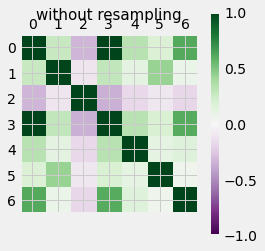

In [136]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

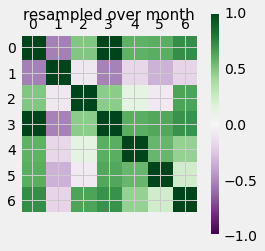

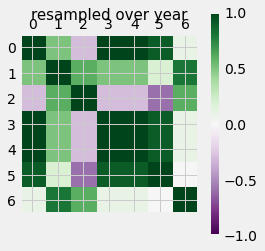

In [137]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

### Machine-Leaning: LSTM Data Preparation and feature engineering

In [138]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### In order to reduce the computation time, and also get a quick result to test the model.  One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.   

In [139]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [140]:
## * Note: I scale all features in range of [0,1].

values = df_resample.values 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


### Splitting the rest of data to train and validation sets

In [141]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


Model architecture

1. LSTM with 100 neurons in the first visible layer
2. dropout 20%
3. 1 neuron in the output layer for predicting Global_active_power. 
4. The input shape will be 1 time step with 7 features.
5. I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
6. The model will be fit for 20 training epochs with a batch size of 70.


Epoch 1/20
126/126 - 3s - loss: 0.0210 - val_loss: 0.0121 - 3s/epoch - 27ms/step
Epoch 2/20
126/126 - 1s - loss: 0.0128 - val_loss: 0.0108 - 1s/epoch - 8ms/step
Epoch 3/20
126/126 - 1s - loss: 0.0115 - val_loss: 0.0098 - 941ms/epoch - 7ms/step
Epoch 4/20
126/126 - 1s - loss: 0.0110 - val_loss: 0.0094 - 952ms/epoch - 8ms/step
Epoch 5/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093 - 1s/epoch - 8ms/step
Epoch 6/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093 - 938ms/epoch - 7ms/step
Epoch 7/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0092 - 1000ms/epoch - 8ms/step
Epoch 8/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0093 - 1s/epoch - 8ms/step
Epoch 9/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0092 - 1s/epoch - 8ms/step
Epoch 10/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0093 - 942ms/epoch - 7ms/step
Epoch 11/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0093 - 1s/epoch - 8ms/step
Epoch 12/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0092 - 1s/epoch - 8ms/step
Epoch 13/20
126/126 

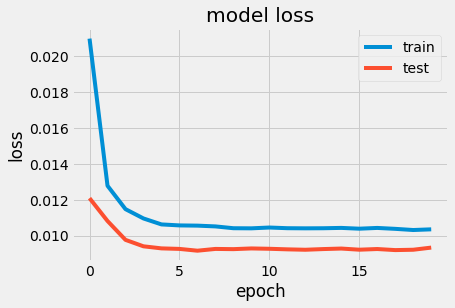

Test RMSE: 0.622


In [142]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Note that in order to improve the model, one has to adjust epochs and batch_size.

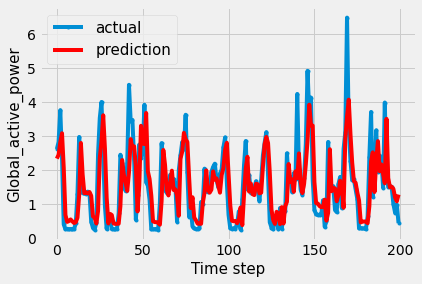

In [143]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()